In [60]:
import numpy as np
import pandas as pd

In [61]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [62]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
794,ham,There generally isn't one. It's an uncountable...,NaN,NaN,NaN
5118,ham,Are you driving or training?,NaN,NaN,NaN
4908,ham,Will do. Have a good day,NaN,NaN,NaN
2153,ham,I dont have i shall buy one dear,NaN,NaN,NaN
3088,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN


In [63]:
df.shape

(5572, 5)

1. Data Cleaning

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [65]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [66]:
df.sample(5)

,v1,v2
762,spam,Urgent Ur å£500 guaranteed award is still uncl...
1767,ham,"K, want us to come by now?"
3576,ham,Yeah confirmed for you staying at that weekend
3158,ham,Are you up for the challenge? I know i am :)
2233,ham,Good Morning plz call me sir


In [67]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1427,ham,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...
187,spam,Please call our customer service representativ...
1549,ham,Dude sux for snake. He got old and raiden got ...
5116,ham,Thanks. Fills me with complete calm and reassu...
595,ham,I am great! How are you?


In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [70]:
# check for duplicate values
df.duplicated().sum()


403

In [71]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [72]:
df.shape

(5169, 2)

2. EDA

In [73]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

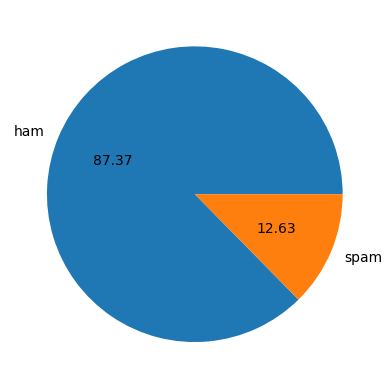

In [75]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [76]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [78]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [79]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [80]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [81]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [82]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

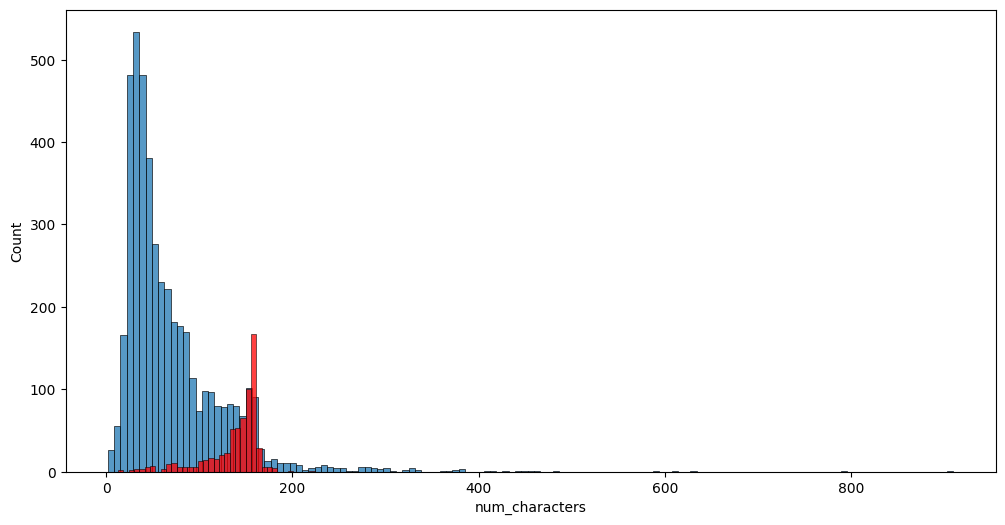

In [83]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

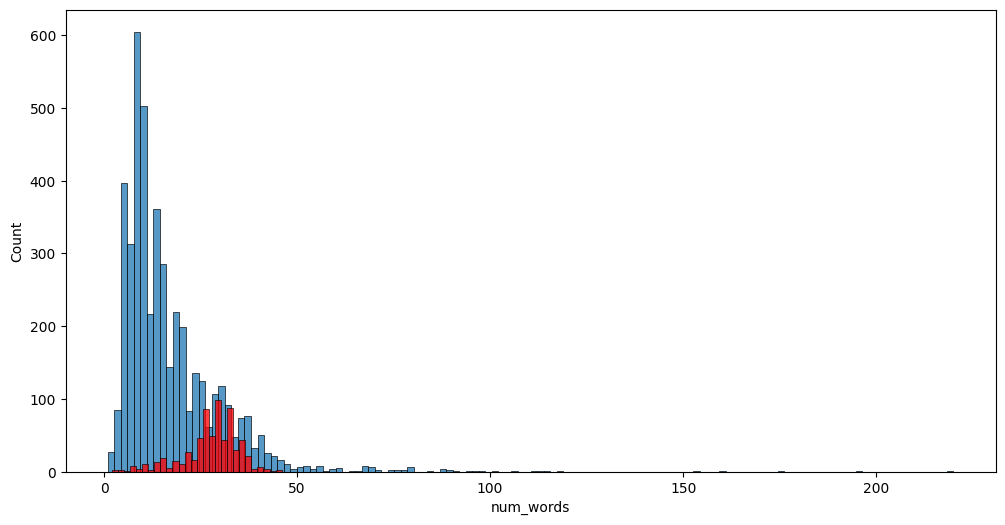

In [84]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

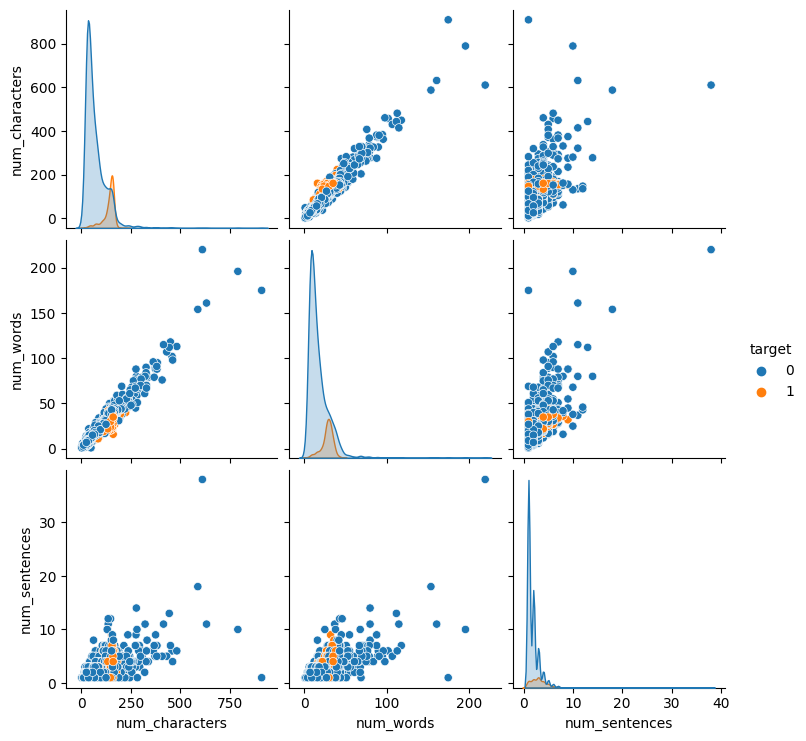

In [85]:
sns.pairplot(df,hue='target')

C:\Users\PCC\AppData\Local\Temp\ipykernel_17800\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

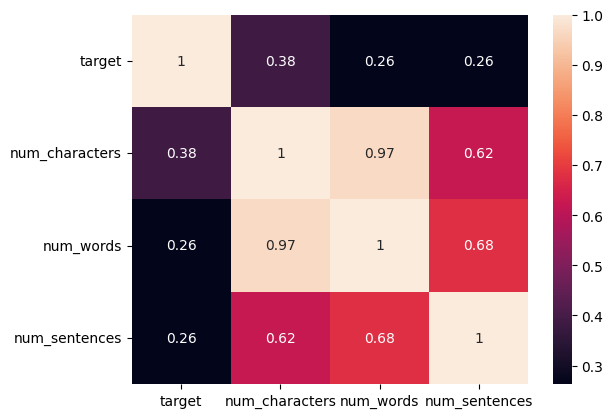

In [86]:
sns.heatmap(df.corr(),annot=True)

3. Data preprocessing

In [87]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [88]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [89]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [90]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

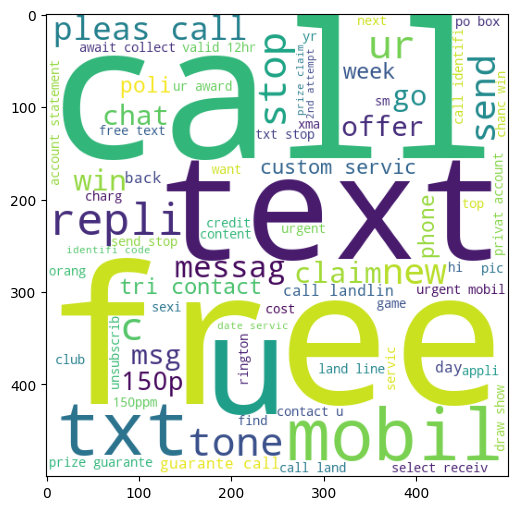

In [92]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

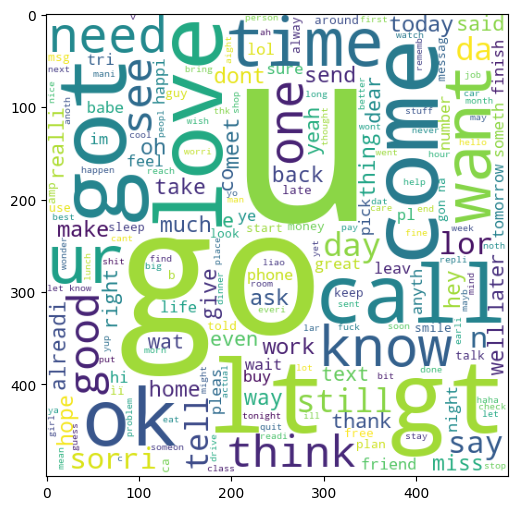

In [93]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [94]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

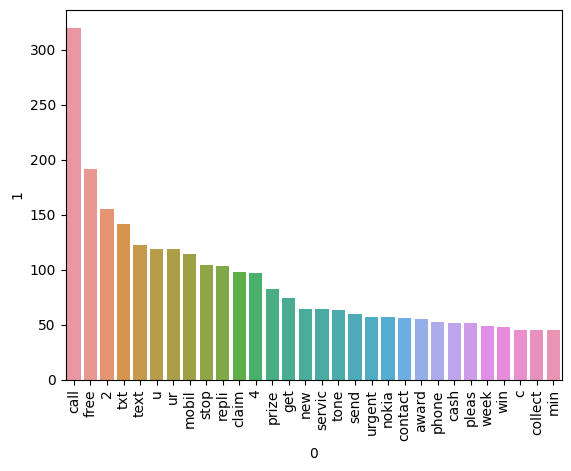

In [95]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

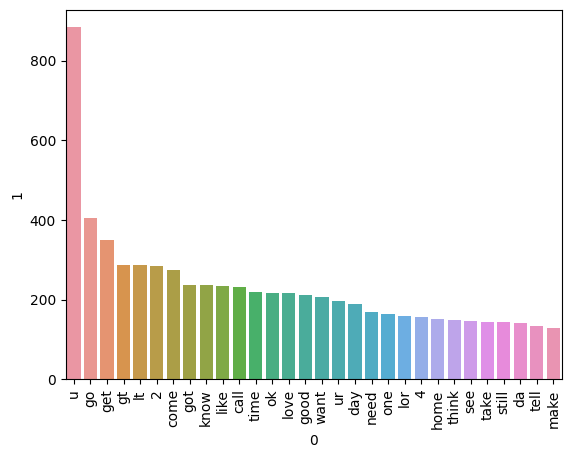

In [97]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [116]:
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
X_tfidf.shape

(5169, 3000)

In [117]:
X_bow = cv.fit_transform(df['transformed_text']).toarray()
X_bow.shape

(5169, 6708)

In [101]:
y = df['target'].values
from sklearn.model_selection import train_test_split

In [102]:
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(X_tfidf,y,test_size=0.2,random_state=2)

In [103]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow = train_test_split(X_bow,y,test_size=0.2,random_state=2)

In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [105]:
mnb = MultinomialNB()
svc = SVC(kernel='linear')

In [106]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    return accuracy,precision,recall

In [107]:
accuracy_scores = []
precision_scores = []
recall_scores = []
clfs = {
    'NB + TF-IDF': mnb, 
    'NB + BOW': mnb,
    'SVC + TF-IDF' : svc, 
    'SVC + BOW' : svc,
}

In [118]:
current_accuracy,current_precision,current_recall = train_classifier(mnb, X_train_tfidf,y_train_tfidf,X_test_tfidf,y_test_tfidf)

In [119]:
print("For NB + TF-IDF")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For NB + TF-IDF
Accuracy -  0.9709864603481625
Precision -  1.0
Recall -  0.782608695652174


In [109]:
current_accuracy,current_precision,current_recall = train_classifier(mnb, X_train_bow,y_train_bow,X_test_bow,y_test_bow)
print("For NB + BoW")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For NB + BoW
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
Recall -  0.9130434782608695


In [110]:
current_accuracy,current_precision,current_recall = train_classifier(svc, X_train_tfidf,y_train_tfidf,X_test_tfidf,y_test_tfidf)
print("For SVM + TF-IDF")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For SVM + TF-IDF
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
Recall -  0.8623188405797102


In [111]:
current_accuracy,current_precision,current_recall = train_classifier(svc, X_train_bow,y_train_bow,X_test_bow,y_test_bow)
print("For SVM + BoW")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For SVM + BoW
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
Recall -  0.855072463768116


In [112]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores})
performance_df

,Algorithm,Accuracy,Precision,Recall
0,NB + TF-IDF,0.970986,1.000000,0.782609
1,NB + BOW,0.964217,0.834437,0.913043
2,SVC + TF-IDF,0.978723,0.975410,0.862319
3,SVC + BOW,0.977756,0.975207,0.855072


In [113]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB + TF-IDF,Accuracy,0.970986
1,NB + BOW,Accuracy,0.964217
2,SVC + TF-IDF,Accuracy,0.978723
3,SVC + BOW,Accuracy,0.977756
4,NB + TF-IDF,Precision,1.000000
5,NB + BOW,Precision,0.834437
6,SVC + TF-IDF,Precision,0.975410
7,SVC + BOW,Precision,0.975207
8,NB + TF-IDF,Recall,0.782609
9,NB + BOW,Recall,0.913043


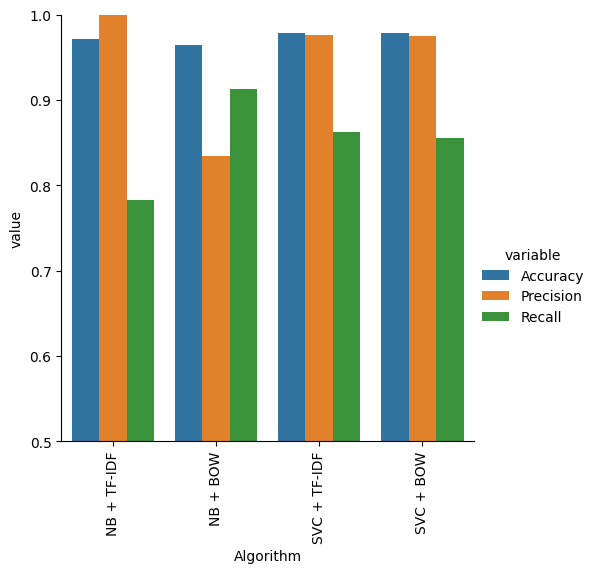

In [114]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [115]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))